In [40]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[27.56764713]
-3.022697338104891


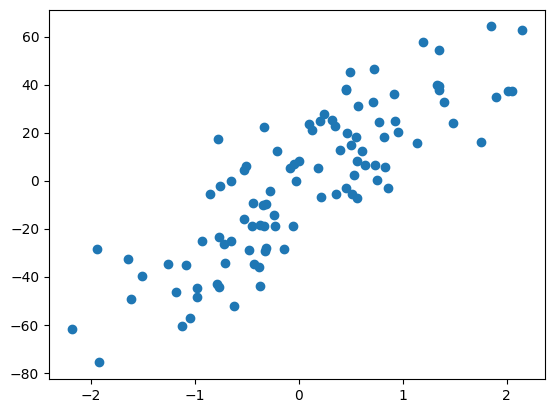

In [41]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+04, tolerance: 7.789e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklear

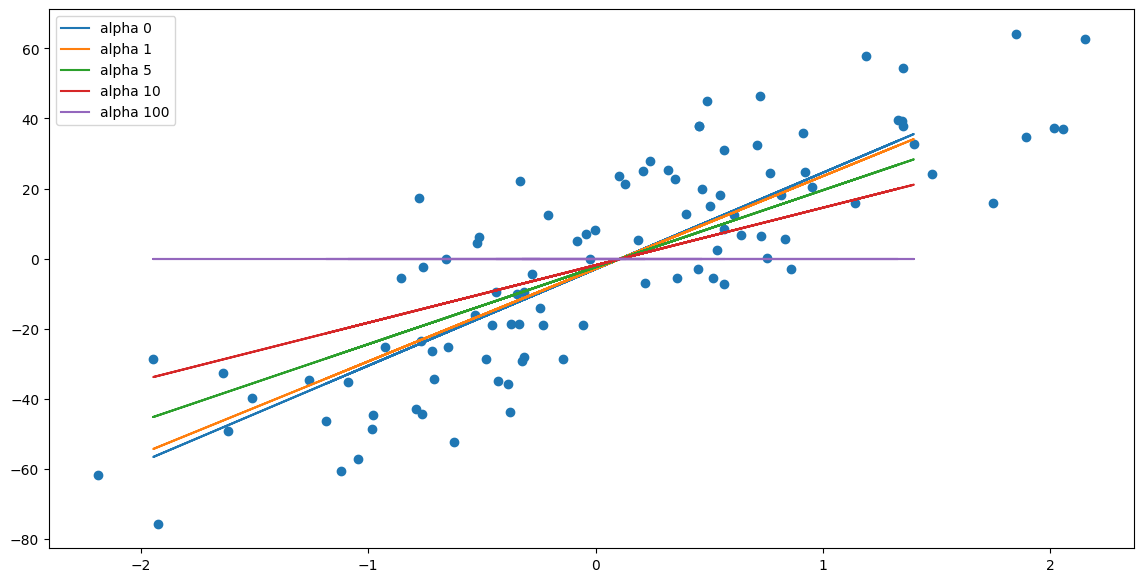

In [42]:
alphas=[0,1,5,10,100]
plt.figure(figsize=(14,7))
plt.scatter(X,y)
for i in alphas:
    l=Lasso(alpha=i)
    l.fit(x_train,y_train)
    y_pred=l.predict(x_test)
    plt.plot(x_test,y_pred,label='alpha {}'.format(i))
plt.legend()
plt.show()

In [43]:
A= 6*np.random.rand(100,1)-3
b=0.7 * A**2 - 2 * A + 3 + np.random.randn(100,1)

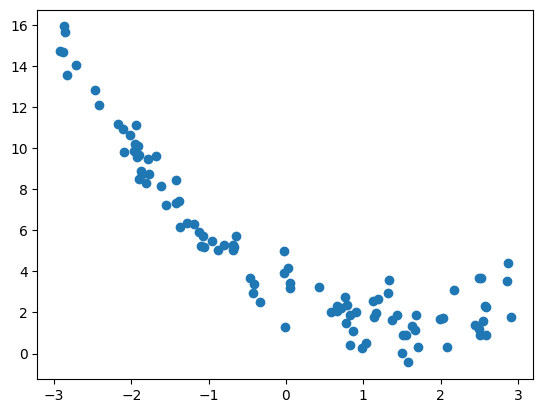

In [44]:
plt.scatter(A,b)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.550e+01, tolerance: 1.671e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+02, tolerance: 1.671e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

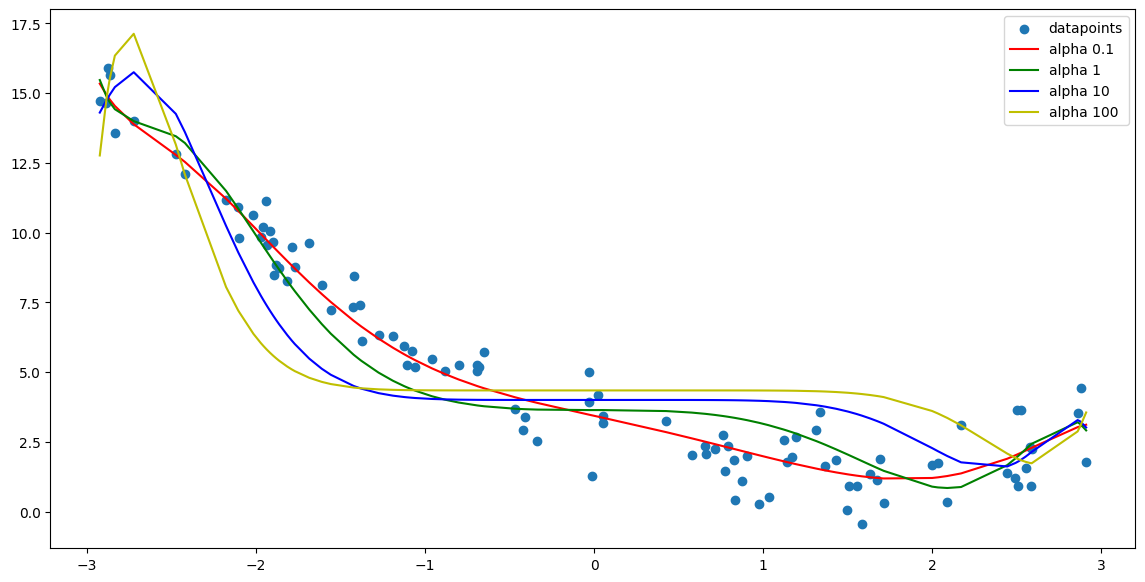

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def get_lasso_pred(A,b,alpha):
    model=Pipeline([
        ('poly_features',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(A,b)
    return model.predict(A)
alphas=[0.1,1,10,100]
cs=['r','g','b','y']
plt.figure(figsize=(14,7))
plt.scatter(A,b,label='datapoints')
for alpha,c in zip(alphas,cs):
    preds=get_lasso_pred(A,b,alpha)
    plt.plot(sorted(A[:,0]),preds[np.argsort(A[:,0])],c,label='alpha {}'.format(alpha))
plt.legend()
plt.show()    




# how coefficeints getting affected

In [46]:
from sklearn.metrics import r2_score
coef=[]
r2_scores=[]
for i in [0.1,1,10,100]:
    l=Lasso(alpha=i)
    l.fit(x_train,y_train)

    coef.append(l.coef_.tolist())
    y_pred=l.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [53]:
coef

[[27.45618957668901], [26.453071622814143], [16.421892084065455], [0.0]]

In [55]:
r2_scores

[0.7123818366770857,
 0.7091088040673196,
 0.5806034064272088,
 -0.005655919613562599]

In [56]:
from sklearn.metrics import r2_score
intercepts=[]
for i in [0.1,1,10,100]:
    l=Lasso(alpha=i)
    l.fit(x_train,y_train)

    intercepts.append(l.coef_.tolist())
    

In [57]:
intercepts

[[27.45618957668901], [26.453071622814143], [16.421892084065455], [0.0]]